In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment',None)

In [2]:
data_repo_url = "https://github.com/data-analytics-in-business/gabor-firm-exit-case-study/raw/main/data/"
data_file = "sample_2012_ABT.csv"
df = pd.read_csv(data_repo_url+data_file)
df.head()

,log_sales,p+l_scaled,ind_cat,default
0,7.093159,-8.951987,3,0
1,13.943477,9.182272,2,0
2,7.932070,-7.758650,3,1
3,12.980031,11.479915,3,0
4,11.773208,-7.763383,3,0


In [3]:
X = df.drop(columns=['default'])
y = df['default']

In [4]:
X.dtypes

log_sales     float64
p+l_scaled    float64
ind_cat         int64
dtype: object

# Sub-section heading

## Numerical variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_num = X[['log_sales','p+l_scaled']]

minmax_scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_num), columns=X_num.columns)
X_num_scaled.head()

## Categorical variables

In [9]:
from sklearn.preprocessing import OneHotEncoder

X_cat = X['ind_cat'].values.reshape(-1, 1)

hot_encoder = OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False)
hot_encoder.fit(X_cat)
X_cat_onehot = pd.DataFrame(hot_encoder.transform(X_cat), 
                                  columns=hot_encoder.get_feature_names_out(['ind_cat']))
X_cat_onehot.head()

,ind_cat_1,ind_cat_2,ind_cat_3
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


## Re-join

In [14]:
X_preprocessed = pd.concat([X_num_scaled, X_cat_onehot], axis=1)
X_preprocessed.head()

,log_sales,p+l_scaled,ind_cat_1,ind_cat_2,ind_cat_3
0,0.020132,0.231099,0.0,0.0,1.0
1,0.763982,0.808822,0.0,1.0,0.0
2,0.111226,0.269116,0.0,0.0,1.0
3,0.659366,0.882020,0.0,0.0,1.0
4,0.528321,0.268965,0.0,0.0,1.0


# Train a model

In [15]:
from sklearn.linear_model import LogisticRegression

prediction_machine = LogisticRegression()

prediction_machine.fit(X_preprocessed,y)

LogisticRegression()

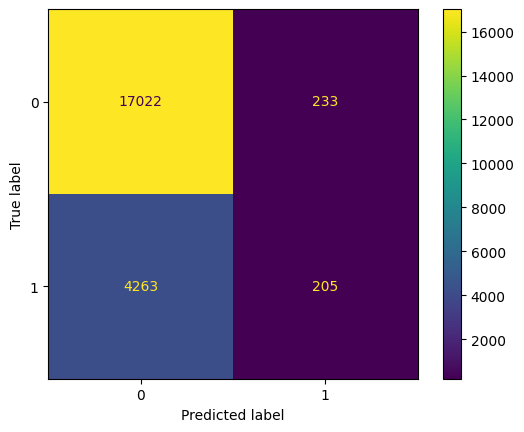

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(prediction_machine, X_preprocessed,y)
plt.show()

# Estimate cost

In [17]:
from sklearn.metrics import confusion_matrix
TN, FN, FP, TP = confusion_matrix(prediction_machine.predict(X_preprocessed), y).ravel())

# Map to the language of defaults

[17022  4263   233   205]


(Next week we will explore how to improve reproducible code and performance!!!)